In [1]:
%matplotlib inline
import homeaccounting as ha
import pandas as pd
import numpy as np
import datetime as dt
import os

# Tutorial
Demonstrates basic usage of the homeaccounting package.

## Artificially create account with random transactions
First, make some random transactions to play with. They will be stored in a csv-file as if I already made an account before. You shouldn't be needed to do anything of this, when using the package yourself later.

In [2]:
# number of random transactions
N = 100

# make a random series of dates
daydiff = np.random.exponential(scale=2, size=N).round()
bdates = np.array([dt.date.today() - dt.timedelta(days=d) for d in daydiff.cumsum()])
bdates = bdates[-1::-1]
vdates = np.array([d + dt.timedelta(days=np.random.randint(3)) for d in bdates])

agent = np.array(['agent %d' % i for i in range(N)])
description = np.array(['description %d' % i for i in range(N)])
types = np.array(['type %d' % i for i in range(N)])

amounts = np.full(N, 1500, dtype=float)
negind = np.random.rand(N) > N*2 / 30 / N
amounts[negind] = -np.random.exponential(scale=100, size=negind.sum())
amounts[0] += 2300

transactions = pd.DataFrame(np.c_[bdates, vdates, agent, types, description, amounts], columns=('booking date', 
                            'value date', 'agent', 'type', 'description', 'amount'))

filename = 'ing-diba'
path = os.path.join('data', 'ing-diba')
transactions.to_csv(os.path.join(path, filename)+'.csv')

## Open existing ING-DiBa account
I here open the artificially created ing_diba_giro account using the existing directory structure ('./data/ing-diba') with the previously used filename. 

The first time this is executed there should be a message saying that 6 transactions were added from two extra csv-files found in the account folder. These two files mimick the csv-format that you get when downloading transactions from the ING-DiBA website (at least in Germany). The two files contain 4 transactions of which 2 are common to both files. The common transactions will only be added once. Hence, there are only 6 added transactions.

The print command will show the current balance of the account after all transactions are processed.

In [3]:
acc = ha.accounts.ing_diba_giro(filename, path=path)
print(acc)

reading new csv-file: Umsatzanzeige_20161211.csv
adding 4 new transactions

reading new csv-file: Umsatzanzeige_20161217.csv
adding 2 new transactions

Added 6 new transactions.
ing-diba: -2304.32 EUR


## Showing monthly summary
You can check and compare the sum of incoming and outgoing transactions for each recorded month. You can select which months to show by giving a (sequence of) integer(s) where 0 is the current month and larger numbers select the corresponding previous months.

In [4]:
acc.get_monthly_balance(range(4))

,debit,credit,balance
2016-12-31,200.0,-2919.289607,-2719.289607
2016-11-30,3000.0,-1599.763786,1400.236214
2016-10-31,0.0,-1986.842517,-1986.842517
2016-09-30,3000.0,-1068.848794,1931.151206


Alternatively, you can select months by a string of the form yyyy-mm:

In [5]:
acc.get_monthly_balance('2016-11')

,debit,credit,balance
2016-11-30,3000.0,-1599.763786,1400.236214


## Selecting transactions of a given month
Having seen the summaries for some months you may want to see the corresponding transactions.

In [6]:
tr, _ = acc.get_month('2016-10')
tr

,booking date,value date,agent,type,description,amount
45,2016-09-30,2016-10-01,agent 45,type 45,description 45,-30.666177
46,2016-10-02,2016-10-03,agent 46,type 46,description 46,-76.286861
47,2016-10-02,2016-10-03,agent 47,type 47,description 47,-66.564557
48,2016-10-03,2016-10-04,agent 48,type 48,description 48,-33.122087
49,2016-10-05,2016-10-06,agent 49,type 49,description 49,-133.278461
50,2016-10-07,2016-10-08,agent 50,type 50,description 50,-56.377195
51,2016-10-08,2016-10-09,agent 51,type 51,description 51,-57.551551
52,2016-10-09,2016-10-10,agent 52,type 52,description 52,-34.546446
53,2016-10-10,2016-10-11,agent 53,type 53,description 53,-109.523293
54,2016-10-11,2016-10-12,agent 54,type 54,description 54,-397.202835


## Selecting most recent transactions
You can get the N most recent transactions.

In [7]:
acc.get_last(10)

,booking date,value date,agent,type,description,amount
99,2016-12-26,2016-12-26,agent 99,type 99,description 99,-27.103774
98,2016-12-25,2016-12-26,agent 98,type 98,description 98,-353.990345
97,2016-12-25,2016-12-25,agent 97,type 97,description 97,-118.887538
96,2016-12-24,2016-12-24,agent 96,type 96,description 96,-49.465087
95,2016-12-22,2016-12-24,agent 95,type 95,description 95,-193.188150
94,2016-12-18,2016-12-18,agent 94,type 94,description 94,-48.476153
93,2016-12-15,2016-12-16,agent 93,type 93,description 93,-1.067789
90,2016-12-12,2016-12-14,agent 90,type 90,description 90,-117.248644
91,2016-12-12,2016-12-14,agent 91,type 91,description 91,-75.114816
104,2016-12-13,2016-12-13,agent 34,type 2,description 139,200.000000


## Finding transactions
You can look for specific transactions based on equality criteria for the different fields of a transaction. For example, for the amount:

In [8]:
acc.find(amount=1500)

,booking date,value date,agent,type,description,amount
38,2016-09-19,2016-09-21,agent 38,type 38,description 38,1500.0
44,2016-09-29,2016-09-30,agent 44,type 44,description 44,1500.0
70,2016-11-15,2016-11-15,agent 70,type 70,description 70,1500.0
77,2016-11-27,2016-11-27,agent 77,type 77,description 77,1500.0


for the dates:

In [9]:
acc.find(vdate='20161103')

,booking date,value date,agent,type,description,amount


In [10]:
acc.find(bdate='20.08.2016')

,booking date,value date,agent,type,description,amount


For the string fields the input is interpreted as a search pattern. All transactions which contain the given pattern in the selected field will be returned:

In [11]:
acc.find(agent='agent 4')

,booking date,value date,agent,type,description,amount
4,2016-07-17,2016-07-17,agent 4,type 4,description 4,-201.637536
40,2016-09-21,2016-09-21,agent 40,type 40,description 40,-18.925118
41,2016-09-22,2016-09-24,agent 41,type 41,description 41,-62.482187
42,2016-09-23,2016-09-25,agent 42,type 42,description 42,-69.726867
43,2016-09-26,2016-09-26,agent 43,type 43,description 43,-3.647068
44,2016-09-29,2016-09-30,agent 44,type 44,description 44,1500.000000
45,2016-09-30,2016-10-01,agent 45,type 45,description 45,-30.666177
46,2016-10-02,2016-10-03,agent 46,type 46,description 46,-76.286861
47,2016-10-02,2016-10-03,agent 47,type 47,description 47,-66.564557
48,2016-10-03,2016-10-04,agent 48,type 48,description 48,-33.122087


In [12]:
acc.find(t_type='46')

,booking date,value date,agent,type,description,amount
46,2016-10-02,2016-10-03,agent 46,type 46,description 46,-76.286861


By default, search is case-insensitive, but you can change that:

In [13]:
acc.find(description='DeScription 12')

,booking date,value date,agent,type,description,amount
12,2016-07-28,2016-07-30,agent 12,type 12,description 12,-95.208549
105,2016-12-12,2016-12-12,agent 78,type 3,description 123,-150.000000


In [14]:
acc.find(description='DeScription 12', case=True)

,booking date,value date,agent,type,description,amount


You can also combine search across fields:

In [15]:
acc.find(description='12', amount=1500)

,booking date,value date,agent,type,description,amount


## Visualising the transaction history
You can plot three kinds of information. The balance of the account over time:

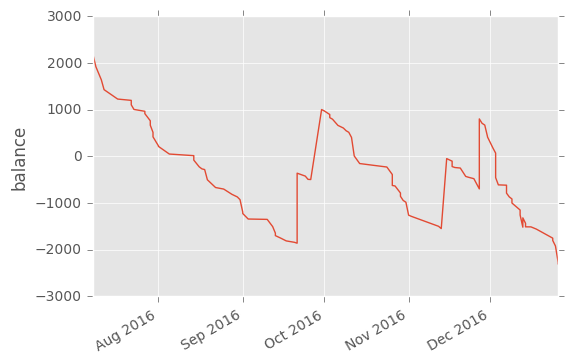

In [16]:
fig = acc.plot_history()

individual transaction amounts over time:

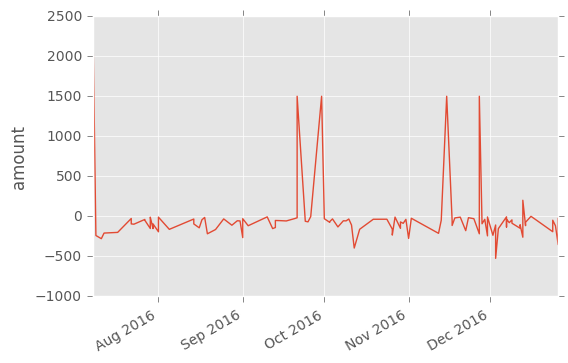

In [17]:
fig = acc.plot_history(what='amount')

or the cumulative sum of transaction amounts within a specified period (equals to balance when the time period includes all transactions):

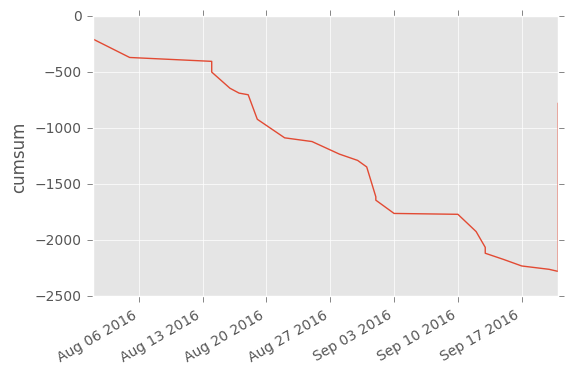

In [18]:
fig = acc.plot_history(startdate='01.08.2016', enddate='23.09.2016', what='cumsum')